<a href="https://colab.research.google.com/github/naomori/codexa_ImageRecognitionForBeginner/blob/master/Chapter3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3: 画像データの変形

本セクションでは、OpenCVを使って画像データの基本操作を行います。

まずは画像データをRGBそれぞれに切り分けます。
![ここ](https://www.codexa.net/wp-content/uploads/2018/12/logo_cv2.png)から画像をダウンロードして、この画像を使って操作を習得します。

In [1]:
from google.colab import files
uploaded = files.upload() 

Saving logo_cv2.png to logo_cv2.png


まずは RGB すべてを含めて Numpy 配列に変換します。

In [4]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
logo = cv2.imread('logo_cv2.png', 1)

In [6]:
logo.shape

(50, 50, 3)

画像データは、Blue, Green, Red の順番になっています。
OpenCVの色順序の初期値が BGR になっているためです。

これを Red, Green, Blue に変更するには、OpenCV の cvtColor()関数を使います。

In [7]:
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)
logo.shape

(50, 50, 3)

それぞれのチャンネル(R,G,B)を入れ替えただけなので、配列のサイズには変更はありません。
各チャンネル（R,G,B）を単体で表示すると、グレースケールとして扱われてしまいます。
そのため、それぞれのカラーで表示するには、3次元として、該当の色以外の輝度を 0 にします。

In [8]:
red = cv2.imread('logo_cv2.png', 1)
red = cv2.cvtColor(red, cv2.COLOR_BGR2RGB)
red[:, :, 1] = 0
red[:, :, 2] = 0

green = cv2.imread('logo_cv2.png', 1)
green = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
green[:, :, 0] = 0
green[:, :, 2] = 0

blue = cv2.imread('logo_cv2.png', 1)
blue = cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)
blue[:, :, 0] = 0
blue[:, :, 1] = 0

各チャンネルの配列を画像として表示してみます。  
表示しているのは、左から
- オリジナル画像
- 色の並びを RGB に変更したもの
- RGB の Red 以外の輝度を 0 にしたもの
- RGB の Green 以外の輝度を 0 にしたもの
- RGB の Blue 以外の輝度を 0 にしたもの

Text(0.5, 1.0, 'blue')

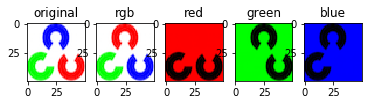

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(6,3))

orig = cv2.imread('logo_cv2.png', 1)
plt.subplot(151)
plt.imshow(orig)
plt.title('original')

plt.subplot(152)
plt.imshow(logo)
plt.title('rgb')

plt.subplot(153)
plt.imshow(red)
plt.title('red')

plt.subplot(154)
plt.imshow(green)
plt.title('green')

plt.subplot(155)
plt.imshow(blue)
plt.title('blue')

## 画像のぼかし処理

OpenCV には「ぼかし」の処理を加える blur()関数があります。
ぼかしが解りやすいように![猫](https://www.codexa.net/wp-content/uploads/2018/12/cat.jpg)の画像を使います。

In [9]:
from google.colab import files
uploaded = files.upload() 

Saving cat.jpg to cat.jpg


In [10]:
cat = cv2.imread('cat.jpg', 1)
cat.shape

(427, 640, 3)

# 画像のぼかし処理

shape() で分かるように、この画像は 427 x 640 のカラー写真です。  
この画像を OpenCV.blue() を使ってぼかしてみます。  
第１引数は imread() で読み込んだ画像データで、   
第２引数は ぼかしたいサイズを指定します。

In [11]:
cat_blur1 = cv2.blur(cat, (5, 5))
cat_blur2 = cv2.blur(cat, (20, 20))
cat_blur3 = cv2.blur(cat, (50, 50))

Text(0.5, 1.0, 'Blur 50x50')

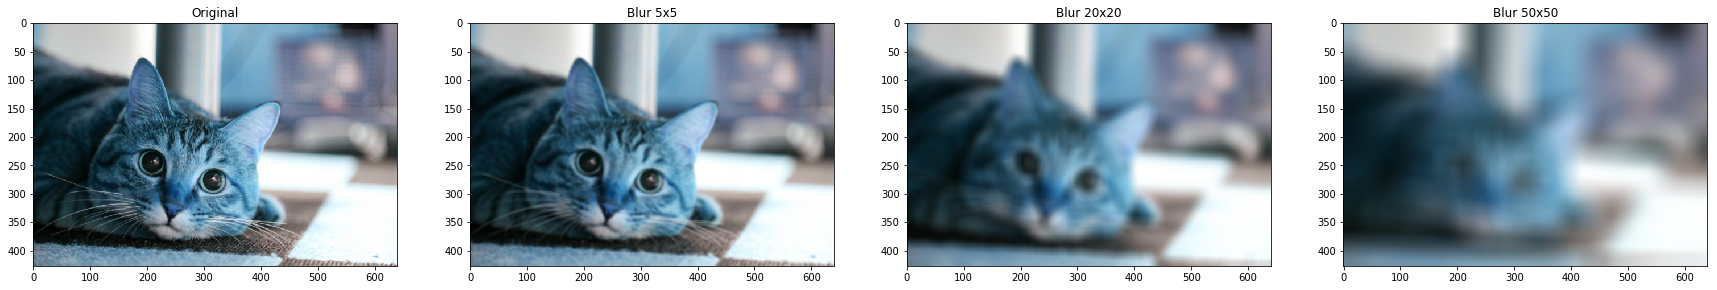

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(30, 40))

# original
plt.subplot(141)
plt.imshow(cat)
plt.title('Original')

# ぼかし処理（サイズ 5, 5）
plt.subplot(142)
plt.imshow(cat_blur1)
plt.title('Blur 5x5')

# ぼかし処理（サイズ 20, 20）
plt.subplot(143)
plt.imshow(cat_blur2)
plt.title('Blur 20x20')

# ぼかし処理（サイズ 50, 50）
plt.subplot(144)
plt.imshow(cat_blur3)
plt.title('Blur 50x50')


ぼかした画像の色合いがおかしくなっているのは、色の順序が違うためです。
* OpenCV の imread()は BGR で読み込みますが、
* Matplotlib の imshow() は初期値で RGB として画像を表示します。

OpenCV のcvtColor() を使って、BGR から RGB へ変換して
表示し直してみます。

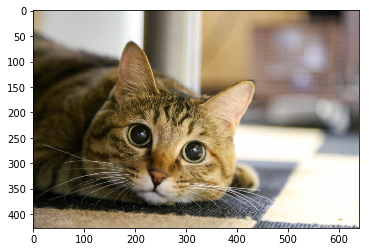

In [13]:
cat_rgb = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
plt.imshow(cat_rgb)

In [14]:
cat_blur1 = cv2.blur(cat_rgb, (5, 5))
cat_blur2 = cv2.blur(cat_rgb, (20, 20))
cat_blur3 = cv2.blur(cat_rgb, (50, 50))

Text(0.5, 1.0, 'Blur 50x50')

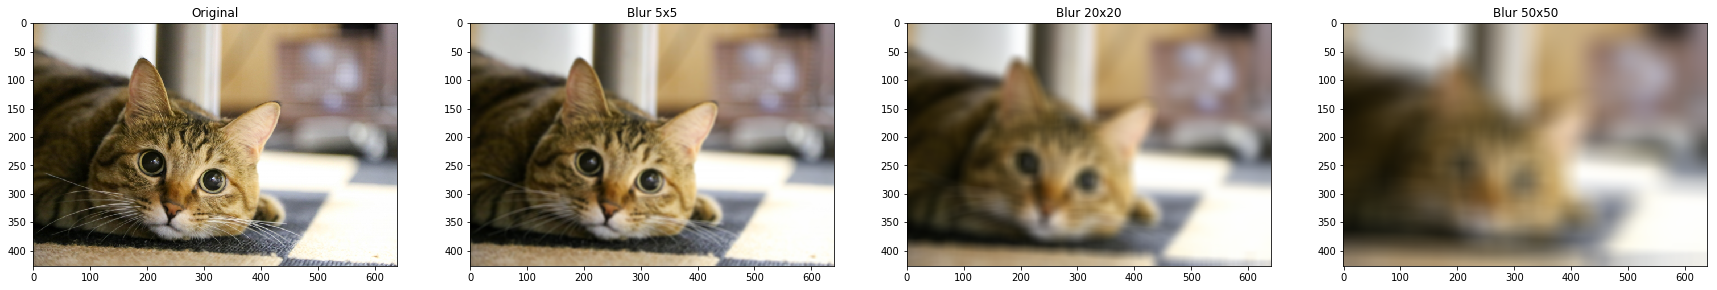

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(30, 40))

# original
plt.subplot(141)
plt.imshow(cat_rgb)
plt.title('Original')

# ぼかし処理（サイズ 5, 5）
plt.subplot(142)
plt.imshow(cat_blur1)
plt.title('Blur 5x5')

# ぼかし処理（サイズ 20, 20）
plt.subplot(143)
plt.imshow(cat_blur2)
plt.title('Blur 20x20')

# ぼかし処理（サイズ 50, 50）
plt.subplot(144)
plt.imshow(cat_blur3)
plt.title('Blur 50x50')

# 画像のエッジ検出(Edge Detection)

次に画像データの Edge Detection 処理をしてみます。  
Edge Detection は画像処理で使われる特徴抽出手法の１つで、
画像の基本的な構造を概ね維持したまま、ピクセル数を削減できるメリットがあります。

Edge Detection には、様々な手法があるみたいですが、
ここでは、OpenCV に実装されている キャニー(Canny)法というアルゴリズムでエッジ検出を行います。
Canny は1986年に考案されましたが、現在でも使われるそうです。

OpenCV の Canny() でエッジ検出をしてみます。  
第２引数はしきい値で、まずは、(5, 50) とします。

Text(0.5, 1.0, 'Canny')

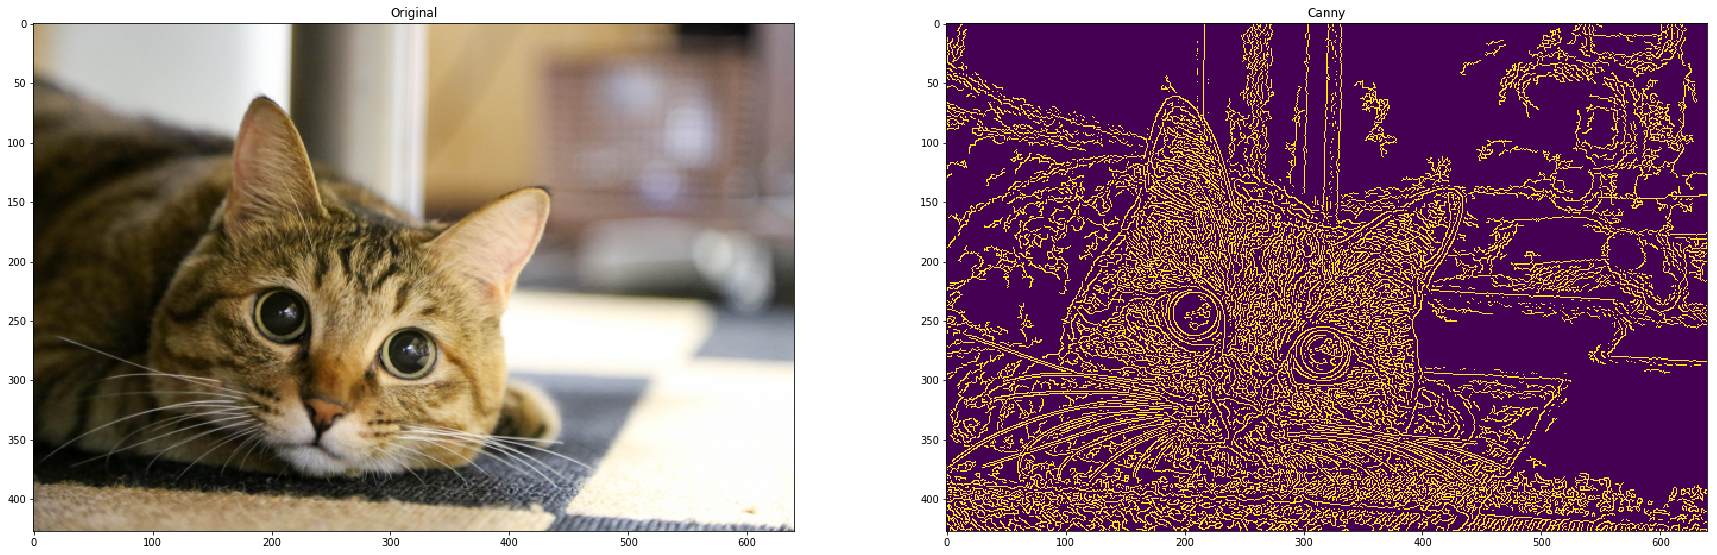

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(30, 40))

# original
plt.subplot(121)
plt.imshow(cat_rgb)
plt.title('Original')

# Canny
cat_edge1 = cv2.Canny(cat_rgb, 5, 50)
plt.subplot(122)
plt.imshow(cat_edge1)
plt.title('Canny')

猫本体内部のエッジが検出され過ぎていて、輪郭をとらえられていないため、
違うしきい値を試してみます。

Text(0.5, 1.0, 'Canny')

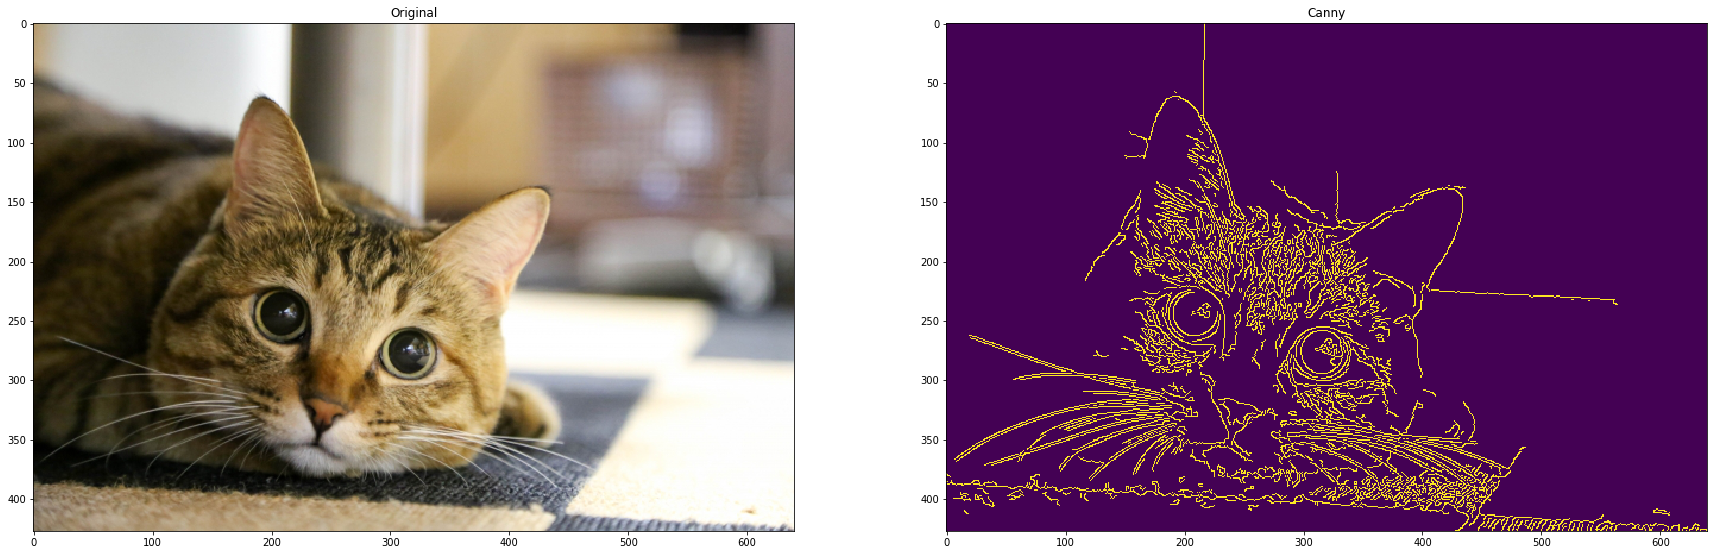

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(30, 40))

# original
plt.subplot(121)
plt.imshow(cat_rgb)
plt.title('Original')

# Canny
cat_edge1 = cv2.Canny(cat_rgb, 100, 200)
plt.subplot(122)
plt.imshow(cat_edge1)
plt.title('Canny')

写真の背景部分はほとんど消えて、猫の顔の特徴（ひげ、耳、目、鼻）が検出されています。  
自分でエッジ検出をするより、OpenCV を使用するとより簡単にエッジ検出を実現できます。

# 画像の操作

まずは、特定の領域（目の部分）を表示してみます。  
OpenCV の imread() で読み込んだ画像データは Numpy 配列なので、
スライシングやインデックス参照を使って、特定の箇所を抽出することが可能です。
配列は「縦・横」の順序になっています。

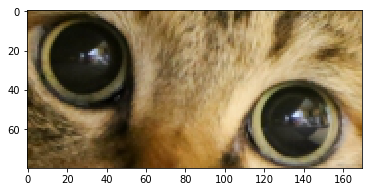

In [18]:
cat_rgb = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
cat_eye = cat_rgb[220:300,180:350,:]
plt.imshow(cat_eye)

次に、画像データに書き込み（○を書き込んでみます）を行います。   
○の書き込みには、OpenCV の circle() を使います。  
circle()関数の引数は
1. 画像
2. ○の中心（横・縦で指定）
3. ○の半径
4. ○の色
5. ○の太さ

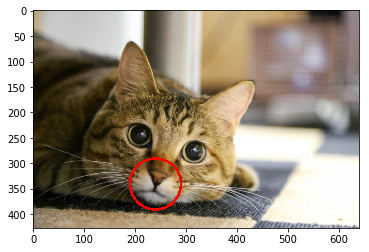

In [19]:
cat_rgb = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
cat_circle = cv2.circle(cat_rgb, (240,340), 50, color=(255, 0, 0), thickness=3)
plt.imshow(cat_circle)

画像に対する文字の書き込みは、OpenCV の putText() の描写関数を利用します。

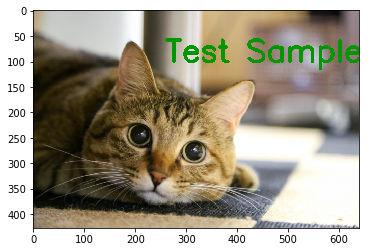

In [20]:
cat_rgb = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
text = 'Test Sample'
cat_text = cv2.putText(
    cat_rgb,
    text,
    org=(260, 100),
    fontFace = cv2.FONT_HERSHEY_SIMPLEX,
    fontScale = 2,
    color=(0, 150, 0),
    thickness = 5
)
plt.imshow(cat_text)